Problem statement:

Use relevant alogorithm in order to make predictions on the advertsing data

In [22]:
#import all the basic libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Load the data

In [23]:
data = pd.read_csv('/content/Advertising (2).csv')

print the data

In [24]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
#unmaned 0 is a irrelavnet column ?  --> repeating the index numbers, and does not have any significance in model learnning

In [25]:
#so drop the col

data.drop('Unnamed: 0',axis=1,inplace = True)  #data.drop('colname',axis=1,inplace =True)

In [26]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Domain analysis

1. Target col ---> Sales

2. TV, Radio, Newspaper ---> Input col

3. Total sales made by the company on investing some ampount on advertising

Baisc checks

In [27]:
data.shape

#200 rows 4 col

(200, 4)

In [ ]:
#print all the col names
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
#data types of the col

data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
#head
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
#tail
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
#entire info on the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#statistical analysis

data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#check if the col has missing values or not

data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

EDA ---> explorartory data analysis

1. UNI

2. BI

3. MULTI

Uni

ananlsying a single col

1. if the col ---> numerical ---> histogram --distplot

2. if the col ----> categorical ---> countplot

<Axes: ylabel='Density'>

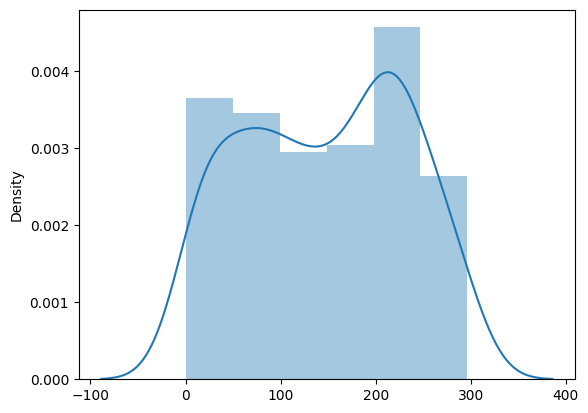

In [ ]:
sns.distplot(x=data['TV'])

Insight : the dist is not normal

In [ ]:
#radio, news, sales -------> hist ---> insight

Bi

analsyning 2 col

tv ---> sales

radio ---> sales

news ----> sales


1. option is to fo with scatterplot

<Axes: xlabel='TV', ylabel='Sales'>

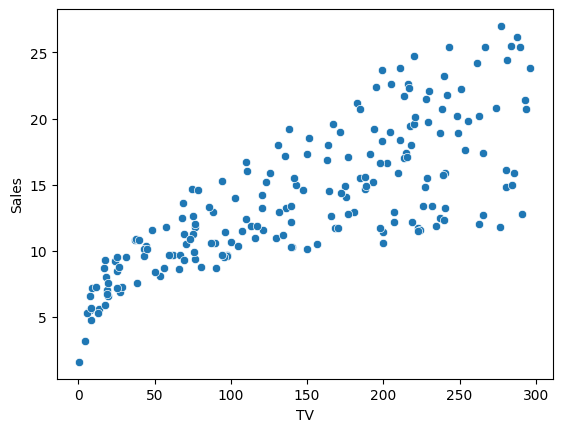

In [ ]:
sns.scatterplot(data=data , x='TV', y='Sales')

As the amount spent on Tv increses the sales is also increasing

Multivariate analysis

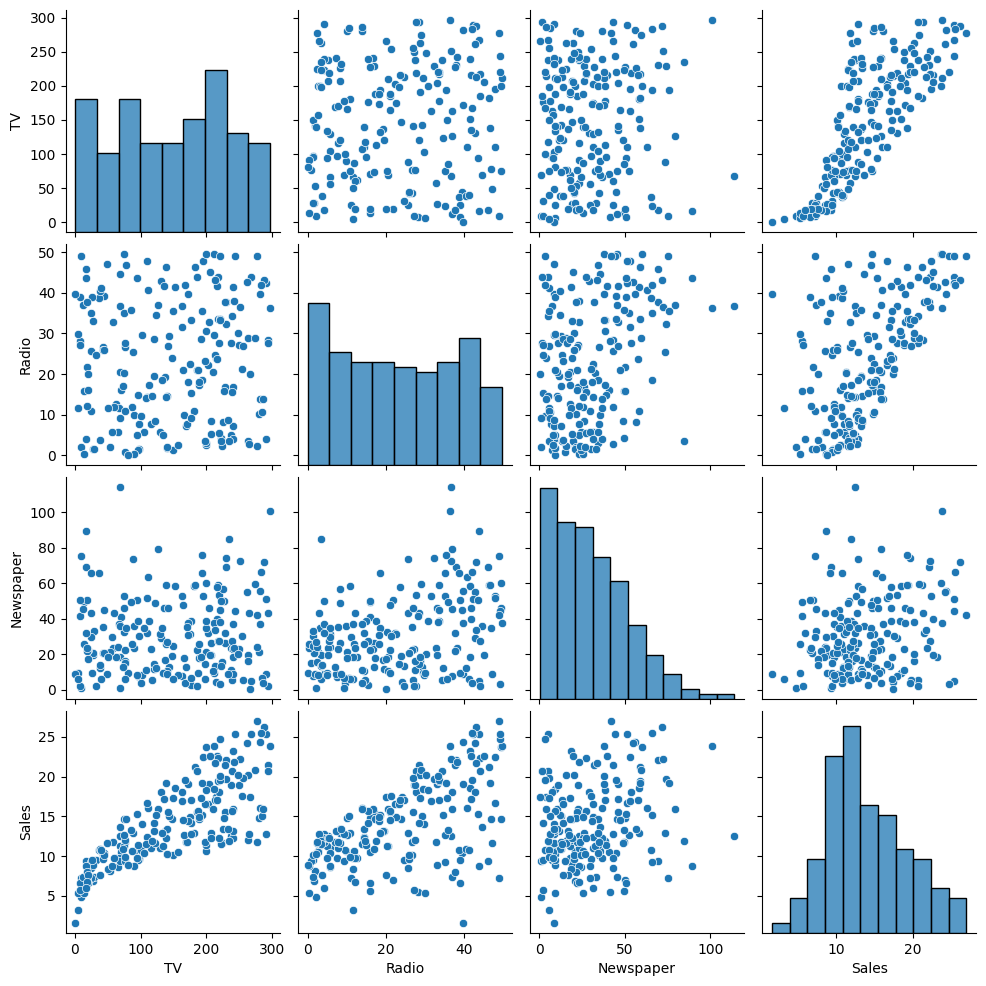

In [ ]:
sns.pairplot(data)

In [ ]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Data Preprocessing

-- > Data preprocessing is nothing but cleaning the data

In [ ]:
#step1: check for missing values ; if you have missing values handle them ?

# if cat attribute ---> replace the missing values by mode

#if numerical ?  distibution ---> normal  replace by mean

##if numerical ? distri ----> not normal/ skewed replace median

In [ ]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
#step 2:  Check for duplicates

#handle ? drop the duplicates  data.drop_duplicates()

data.duplicated().sum()

0

In [ ]:
#step3: check the data types of the columns

# data types ---> if the col is holing the numerical data or categorical data

#if the data type of the col id int or float --go ahead

#if the data type of the col is object(categorical data) ---> convert the text to numerica

In [ ]:
data.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
#Step4 : check for outliers

#sns.boxplot(x = data.column)

<Axes: xlabel='Newspaper'>

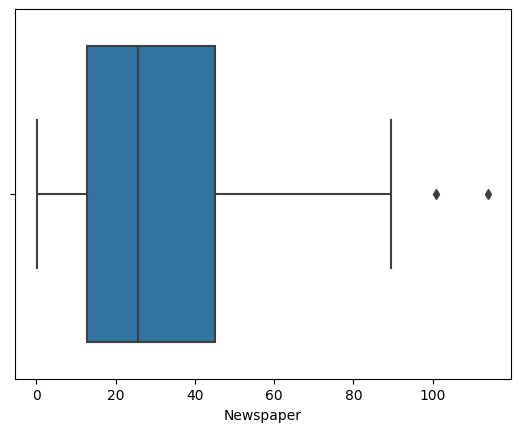

In [ ]:
sns.boxplot(x = data.Newspaper)

In [ ]:
#we have outliers we need handle them

#how to handle ?  1. IQR ---- this method is used when data is not normal
                # 2. 3sigma rule ----> this methos is used when data is normal

<Axes: ylabel='Density'>

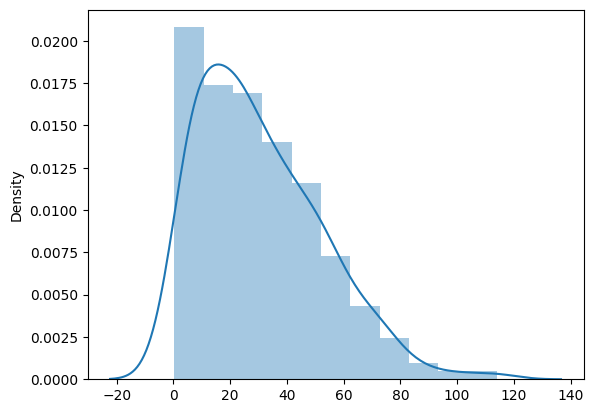

In [ ]:
sns.distplot(x = data['Newspaper'])


IOR

1. find Q1 and Q3

2. IQR = Q3 - Q1

3. Find lower and upper limit

4. lower_limit = Q1 - 1.5 * IQR

5. upper_limit = Q3 + 1.5 * IQ6

6. Find the records/ values / datapoints greater than upper limit and less than lower(outliers)



In [28]:
#fine Q1 and Q3

Q1 = data['Newspaper'].quantile(0.25)
print('lower quartile',Q1)

Q3 = data['Newspaper'].quantile(0.75)
print('Upper quartile',Q3)

lower quartile 12.75
Upper quartile 45.1


In [29]:
#IQR
IQR = Q3 - Q1
IQR

32.35

In [30]:
#find lower and upper limit

lower_limit = Q1 - 1.5 * IQR
print('lower limit ',lower_limit)

upper_limit = Q3 + 1.5 * IQR
print('upper limit ',upper_limit)

lower limit  -35.775000000000006
upper limit  93.625


In [31]:
#find the values above the upper limit

data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [ ]:
#find the percentage of outliers  ?
#if the percentage is less than 5% then only we will handle the outliers
#if the percenatge is greater the 5% then dont handle

In [ ]:
len(data.loc[data['Newspaper']>upper_limit])

2

In [ ]:
len(data)

200

In [32]:
(len(data.loc[data['Newspaper']>upper_limit])/len(data))*100

1.0

In [ ]:
#1% of outlier is there , handle it ? ---> replace the those observations giving you
                                        # outlier by median since data is not noral

In [33]:
data.loc[data['Newspaper']>upper_limit,'Newspaper'] = data['Newspaper'].median()

In [ ]:
#we successfully handled outliers wrt to upper limit

In [ ]:
#lower limit
data.loc[data['Newspaper']<lower_limit]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [ ]:
#scaling
#encoding---> cat into numerical

1. missing value

2. duplicates

3. datatype --->cat attri

4. outliers

our data is preprocess now!! and ready for next step

Feature selection / feature engineering

we select the important features

2 steps here

1. drop the irrelevant columns ---> eg Unnamed 0 in this case

3. heatmap ? co relation of input attributes ?


In [ ]:
df = data.corr()

<Axes: >

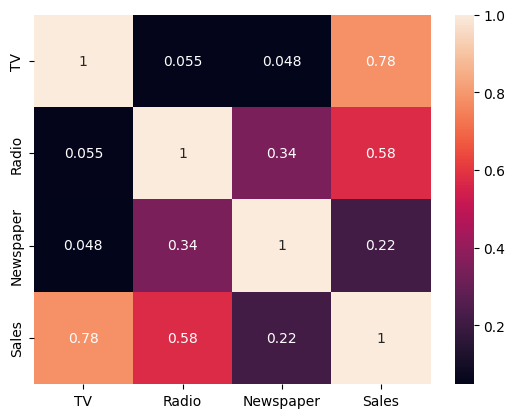

In [ ]:
sns.heatmap(data.corr(),annot = True)

<Axes: >

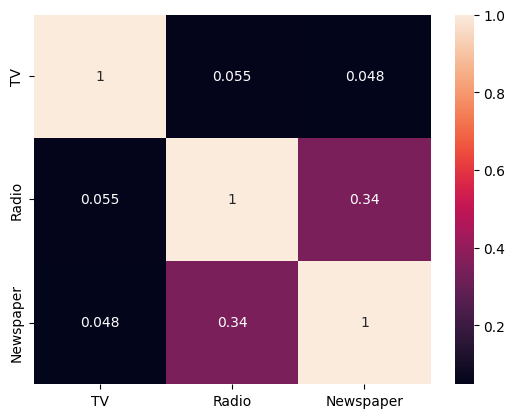

In [ ]:
sns.heatmap(data.drop('Sales',axis = 1).corr(),annot =True)

In [ ]:
#since no col is giving us more 85% co rel we are slecting all the col

#MODEL BUILDING

1. input feature x

2. target y

In [ ]:
x = data.drop('Sales',axis = 1)

In [34]:

y = data['Sales']

In [17]:
#Sklearn
# it is one of the scientific library which includes all the packages related to ML


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.30 , random_state = 4 )

In [ ]:
#random_state is responsible for randomly picking the records from the data

In [ ]:
#training ---> x_train , y_train

#testing ----> x_test, y_test

In [37]:
x_train.shape

(140, 3)

In [38]:
x_test.shape

(60, 3)

#algorithm

In [39]:
#import linear regression model

from sklearn.linear_model import LinearRegression

In [40]:
#initialise the model

model = LinearRegression()

In [41]:
#Train the model with x_train and y_train

model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#we trained the model, we have trained the linear reg model

In [ ]:
#make the predioction ---> we are testing the model

#we know our entire data is divided into train and test

#in order to test model we have to send new records , in order to get the prediction

#which is the new data? x_test

In [42]:
y_pred = model.predict(x_test)

In [43]:
y_pred

array([17.11920196, 16.86343137, 21.80867738, 24.55443423, 12.3155194 ,
       20.92742165, 10.10412313, 12.37902465, 11.99570844, 16.95369111,
       22.81007152, 15.1981792 ,  8.4657263 , 14.88506108, 18.54549016,
       18.5612111 , 18.70116245, 14.50770633,  9.74439917, 20.58825997,
       14.89035187, 17.71204411, 23.05479076,  7.72066599, 21.4435882 ,
       19.61759881, 13.81348356, 11.64299601, 18.42933279, 12.21072397,
       11.41183731,  9.96393166, 13.49958752, 15.19317807, 18.10601562,
        6.92406996, 14.20072023, 14.27620674, 14.10646271, 10.77352628,
       14.84385103, 11.94916737, 10.70309421, 10.40075312,  6.20529208,
       16.82109527, 16.46119818, 12.07762468, 10.73444639, 20.86473587,
       15.08126005, 15.41063402, 12.79667983, 14.11738167, 12.36964978,
        9.02390838, 20.50392858,  9.34145403,  5.36475925,  8.24787047])

In [45]:
#slopes  --> 3 diff ---> 3 input ---> coefficients of x

model.coef_

array([0.04539939, 0.17757031, 0.00502354])

In [46]:
#intercept
model.intercept_

3.090172035290914

In [ ]:
#what will be the total sales if my investment on TV = 100, Radio = 50 , Newspaper = 10

In [47]:
#How to make the predictions

model.predict([[100,50,10]])

array([16.55886148])

#Evaluating the model

In [ ]:
#Error / loss function to kmow the diffrence b/w actual and predicted value

#Diff error /loss function

#MAE --->Mean absolute error
#MSE  --> Mean squared error
#RMSE ---> root Mean squared error

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
MSE = mean_squared_error(y_test, y_pred)
MSE

2.204438630669019

In [50]:
#MAE
MAE = mean_absolute_error(y_test,y_pred)
MAE

1.199298085047556

In [51]:
#RMSE
RMSE = np.sqrt(MSE)
RMSE

1.4847352055733773

In [53]:
r2_score(y_test,y_pred)


0.9134809669573122

In [ ]:
#91%  ---> model has learnt 91% of the data
#91% of true predictions